In [1]:
u = {ux[x, y, z], uy[x, y, z], uz[x, y, z]};
eps = 1 / 2 (Grad[u, {x, y, z}] + Transpose[Grad[u, {x, y, z}]]);
sigma[l_, m_] = (l Tr[eps]) IdentityMatrix[3] + (2 m) eps;
problem[l_, m_] = -Div[sigma[l, m], {x, y, z}];


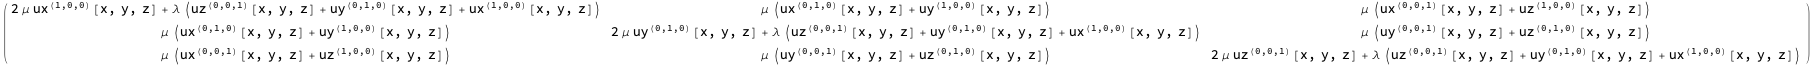

In [5]:
sigma[\[Lambda], \[Mu]] // MatrixForm

In [6]:
Y = 10^1;
nu = 0.3;
K = Y / (3 (1 - nu));
G = Y / (2 (1 + nu));
lambda = K - 2 / 3 G;
mu = G;

Out[52]:
 
 
 
 
 Out[53]:
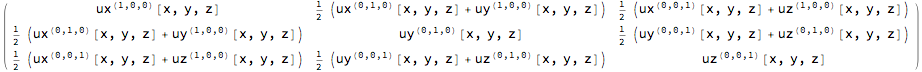
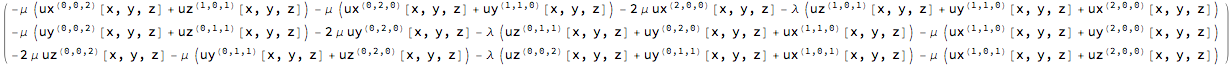

In [52]:
eps // MatrixForm
problem[\[Lambda], \[Mu]] // MatrixForm

In [108]:
{xfun, yfun, zfun} = NDSolveValue[{problem[lambda, mu] == {0, 0, -9.8 * 1000}, 
            {ux[0, y, z] == 0, uy[0, y, z] == 0, uz[0, y, z] == 0},
            {ux[x, y, 0] == 0, uy[x, y, 0] == 0, uz[x, y, 0] == 0},
            {ux[x, 0, z] == 0, uy[x, 0, z] == 0, uz[x, 0, z] == 0},
            {ux[x, 1, z] == 0, uy[x, 1, z] == 0, uz[x, 1, z] == 0}, 
            {ux[x, y, 1] == 0, uy[x, y, 1] == 0, uz[x, y, 1] == 0}},
            {ux, uy, uz}, {x, 0, 1}, {y, 0, 1}, {z, 0, 1}];

In [100]:
meshx = MeshRegion[xfun["ElementMesh"]];
meshy = MeshRegion[yfun["ElementMesh"]];
meshz = MeshRegion[zfun["ElementMesh"]];

dmeshx = ElementMeshDeformation[meshx, {xfun, yfun, zfun}];
dmeshy = ElementMeshDeformation[meshy, {xfun, yfun, zfun}];
dmeshz = ElementMeshDeformation[meshz, {xfun, yfun, zfun}];


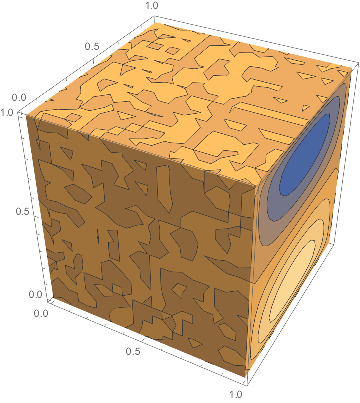

In [123]:
SliceContourPlot3D[xfun[x, y, z], meshx, {x, 0, 1}, {y, 0, 1}, {z, 0, 1}]


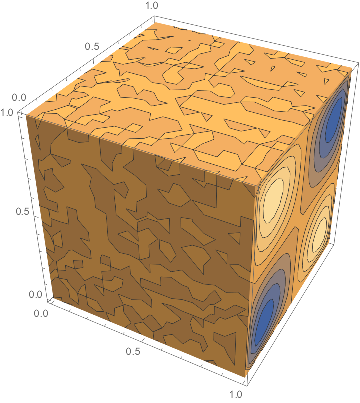

In [124]:
SliceContourPlot3D[yfun[x, y, z], meshy, {x, 0, 1}, {y, 0, 1}, {z, 0, 1}]


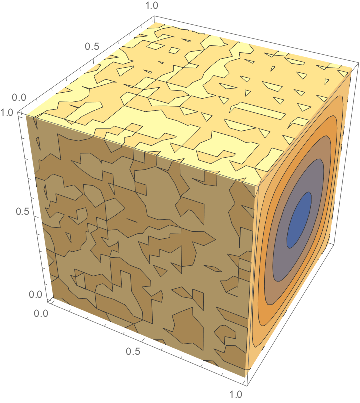

In [125]:
SliceContourPlot3D[zfun[x, y, z], meshz, {x, 0, 1}, {y, 0, 1}, {z, 0, 1}]